# **CV CEA**

####**In the code below, we have used Keras to build an image classification model trained on the CIFAR-10 dataset. It uses the following layers/functions:**
*   For building the Model - CNN, Maxpooling and Dense Layers.

*   For Activation Function - ReLU (in CNN layers for handling image pixels) and Softmax (for final classification).

*   For handling Overfitting (Regularizing) - DropOut Layer.

*   For normalizing/standardizing the inputs between the layers (within the network) and hence accelerating the training, providing regularization and reducing the generalization error - Batch Normalization Layer.

In [ ]:
# Importing required libraries
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras import datasets, layers, models
from keras.utils import to_categorical
from keras import regularizers
from keras.layers import Dense, Dropout, BatchNormalization
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping

### **Exploring Dataset**

In [ ]:
ju# Loading dataset & splitting it into train and test set
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [ ]:
# Checking the shape of train and test set
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [ ]:
# Checking the number of unique classes in dataset
print(np.unique(train_labels))
print(np.unique(test_labels))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [ ]:
# Creating a list of all the class labels
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

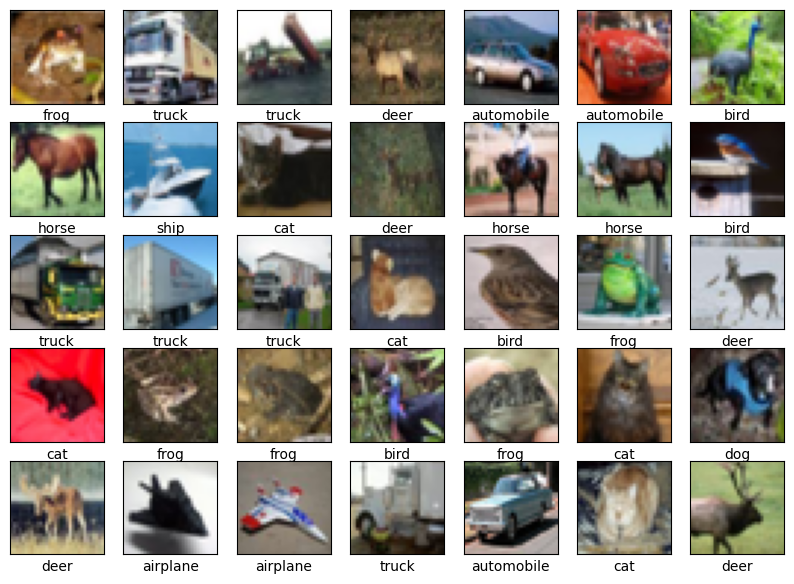

In [ ]:
# Visualizing some of the images from the training dataset
plt.figure(figsize=[10,10])
for i in range (35):    # for first 35 images
  plt.subplot(7, 7, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i][0]])
plt.show()

### **Data Preprocessing**


*   We will apply Standardization/Normalization to convert all pixel values to values between 0 and 1.
*   We will convert image type to float since we are applying one hot encoding which needs the data to be of type float by default.
*   The reason for using to_categorical (one hot encoding) is that the loss function that we are using in this code (categorical_crossentropy) when compiling the model needs data to be one hot encoded.





In [ ]:
# Standardizing (255 is the total number of pixels an image can have)
train_images = train_images / 255.0
test_images = test_images / 255.0

# Converting the pixels data to float type
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

# One hot encoding the target class (labels)
num_classes = 10
train_labels = to_categorical(train_labels, num_classes)
test_labels = to_categorical(test_labels, num_classes)

### **Building a Machine Learning (CNN) Model**

In [ ]:
# Creating a sequential model and adding layers to it

model = Sequential()

model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32,32,3)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.3))

model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.5))

model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.5))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(num_classes, activation='softmax'))    # num_classes = 10

# Checking the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                        

### **Configuring and Compiling Model**


*   Optimizer used during Back Propagation for weight and bias adjustment - Adam (adjusts the learning rate adaptively).
*   Loss Function used - Categorical Crossentropy (used when multiple categories/classes are present).
*   Metrics used for evaluation - Accuracy.






In [ ]:
model.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

### **Training and Evaluating Model**

In [ ]:
# Define the EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Fit the model with EarlyStopping callback
history = model.fit(train_images, train_labels, batch_size=64, epochs=40, validation_data=(test_images, test_labels), callbacks=[early_stopping])

# CODE EXPLANATION
# EarlyStopping Callback: Monitors the validation loss (val_loss) and stops training if it does not improve for 5 consecutive epochs (patience=5).
# It also restores the best weights obtained during training.
# callbacks Parameter: Includes the early_stopping callback in the fit method, ensuring that training will stop early if the monitored quantity does not improve.
# This approach helps in preventing overfitting and ensures that the model training is efficient.


Epoch 1/40
782/782 [==============================] - 399s 511ms/step - loss: 0.6230 - accuracy: 0.7853 - val_loss: 0.5868 - val_accuracy: 0.8043
Epoch 2/40
782/782 [==============================] - 382s 488ms/step - loss: 0.5886 - accuracy: 0.7985 - val_loss: 0.7369 - val_accuracy: 0.7576
Epoch 3/40
782/782 [==============================] - 385s 493ms/step - loss: 0.5689 - accuracy: 0.8060 - val_loss: 0.5734 - val_accuracy: 0.8114
Epoch 4/40
782/782 [==============================] - 382s 488ms/step - loss: 0.5462 - accuracy: 0.8123 - val_loss: 0.5348 - val_accuracy: 0.8180
Epoch 5/40
782/782 [==============================] - 384s 491ms/step - loss: 0.5405 - accuracy: 0.8151 - val_loss: 0.5562 - val_accuracy: 0.8087
Epoch 6/40
782/782 [==============================] - 380s 486ms/step - loss: 0.5178 - accuracy: 0.8209 - val_loss: 0.5617 - val_accuracy: 0.8120
Epoch 7/40
782/782 [==============================] - 378s 484ms/step - loss: 0.5080 - accuracy: 0.8262 - val_loss: 0.5199 -


#### ==> **Evaluation Visualization**
*   Using Loss Curve - Comparing the Training Loss with the Testing Loss over increasing Epochs.
*   Using Accuracy Curve - Comparing the Training Accuracy with the Testing Accuracy over increasing Epochs.


Text(0.5, 1.0, 'Loss Curves')

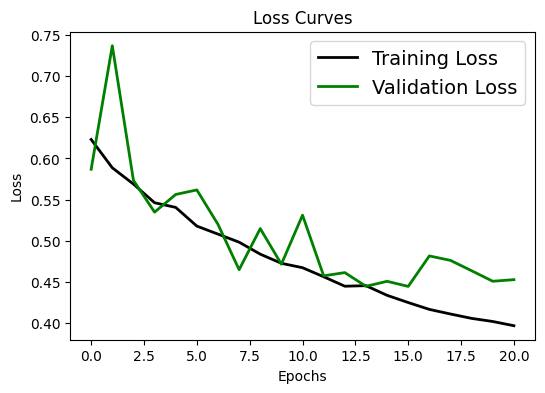

In [ ]:
# Plotting Loss Curve
plt.figure(figsize=[6,4])
plt.plot(history.history['loss'], 'black', linewidth=2.0)
plt.plot(history.history['val_loss'], 'green', linewidth=2.0)
plt.legend(['Training Loss', 'Validation Loss'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Loss', fontsize=10)
plt.title('Loss Curves', fontsize=12)

Text(0.5, 1.0, 'Accuracy Curves')

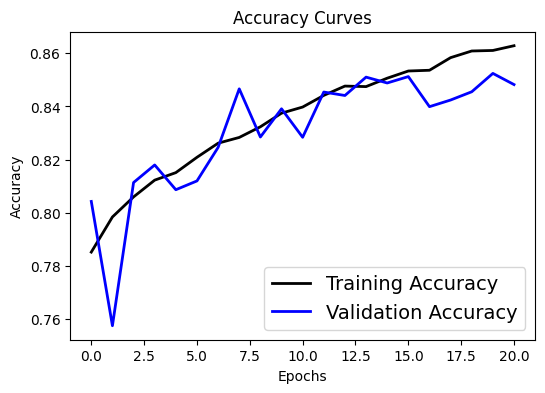

In [ ]:
# Plotting Accuracy Curve
plt.figure(figsize=[6,4])
plt.plot(history.history['accuracy'], 'black', linewidth=2.0)
plt.plot(history.history['val_accuracy'], 'blue', linewidth=2.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.title('Accuracy Curves', fontsize=12)

### **Predicting Results**

In [ ]:
# Making the Predictions
pred = model.predict(test_images)
print(pred)

# Converting predictions into label index
pred_classes = np.argmax(pred, axis=1)
print(pred_classes)

313/313 [==============================] - 20s 64ms/step
[[1.60679076e-04 1.06728934e-04 7.06273247e-04 ... 8.32416335e-05
  6.28578127e-05 7.07083382e-05]
 [8.35361541e-04 2.71313302e-02 8.07576797e-08 ... 1.42240761e-08
  9.72001910e-01 3.08953531e-05]
 [4.63989843e-03 3.06144983e-01 1.87170317e-05 ... 1.93519172e-05
  6.84063077e-01 4.78740176e-03]
 ...
 [3.68589372e-06 7.82296468e-07 5.95844293e-04 ... 2.26738886e-03
  1.49481787e-06 3.05687792e-07]
 [3.62928391e-01 5.74484110e-01 2.92973313e-02 ... 8.45806615e-04
  6.38132449e-04 6.96465559e-03]
 [1.10789010e-07 8.54307132e-08 2.21683820e-07 ... 9.99883831e-01
  7.73085063e-09 3.62969876e-09]]
[3 8 8 ... 5 1 7]


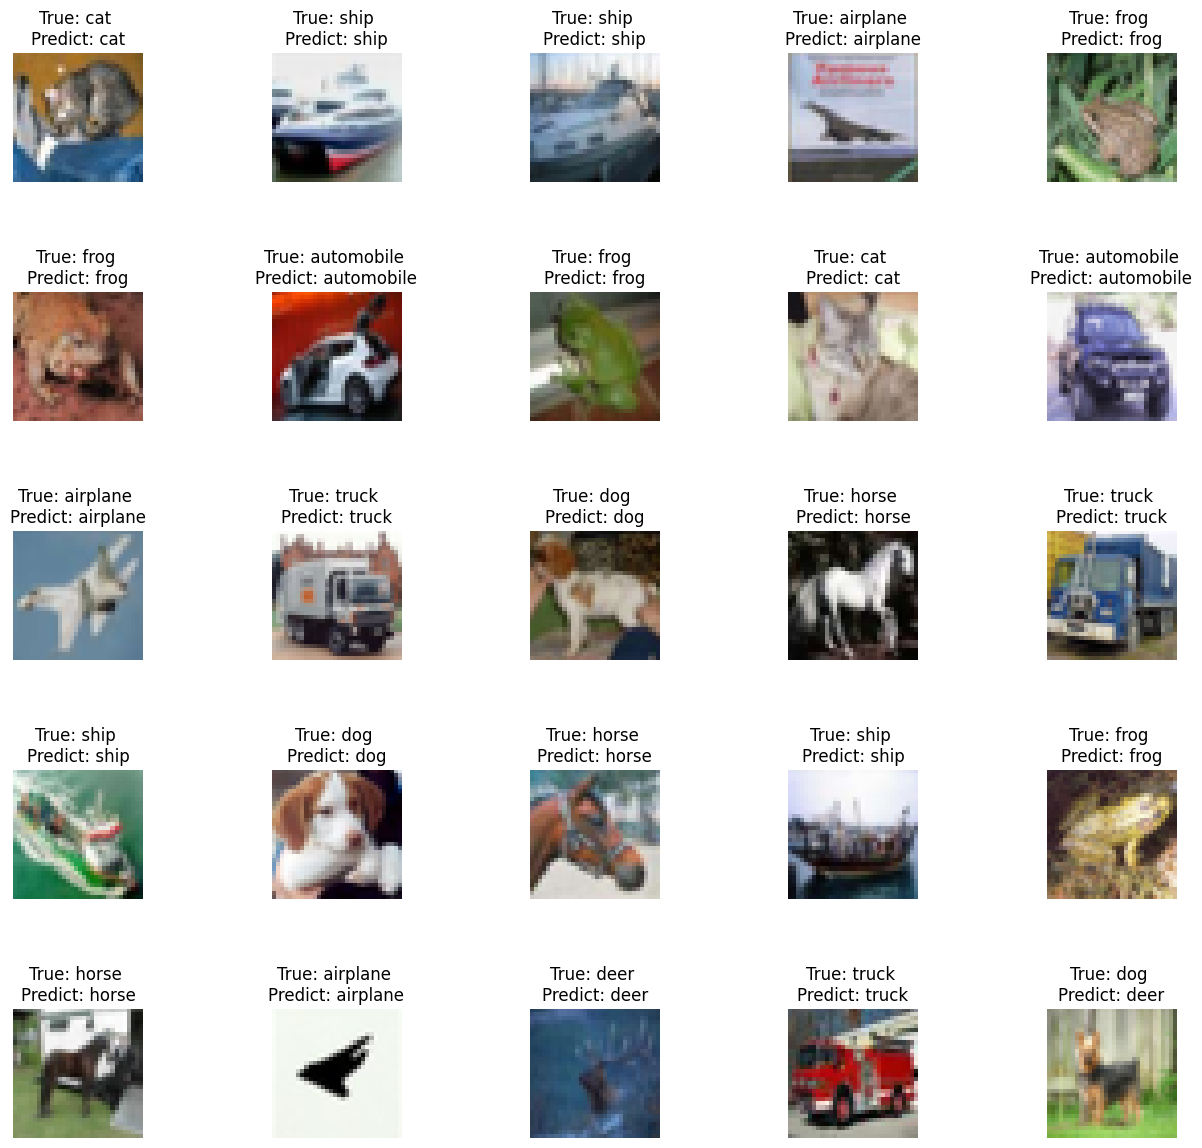

In [ ]:
# Plotting "Actual Vs Predicted" Results

fig, axes = plt.subplots(5, 5, figsize=(15,15))
axes = axes.ravel()

for i in np.arange(0, 25):
    axes[i].imshow(test_images[i])
    axes[i].set_title("True: %s \nPredict: %s" % (class_names[np.argmax(test_labels[i])], class_names[pred_classes[i]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)